In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from statsmodels.graphics import utils
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 

In [3]:
df_1 = pd.read_csv("properties_2016.csv")
df_2 = pd.read_csv("train_2016_v2.csv")
df_1 = df_1.set_index("parcelid")
df_2 = df_2.set_index("parcelid")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df = pd.concat([df_2, df_1], join='inner', axis=1)

In [5]:
df['transactiondate'] = df['transactiondate'].astype('datetime64').dt.month
df['taxdelinquencyyear'].replace(99, -1, inplace=True)
df['taxdelinquencyyear'] = 16 - df['taxdelinquencyyear']
df['taxamount'].fillna(df['taxamount'].mean(), inplace=True)
df['taxdelinquencyyear'].fillna(0, inplace=True)
df['taxdelinquencyflag'].fillna(0, inplace=True)
df['landtaxvaluedollarcnt'].fillna(df['landtaxvaluedollarcnt'].mean(), inplace=True)
df['structuretaxvaluedollarcnt'].fillna(df['structuretaxvaluedollarcnt'].mean(), inplace=True)
df['propertycountylandusecode'].fillna(df['propertycountylandusecode'].mode()[0], inplace=True)
df['regionidzip'].fillna(df['regionidzip'].mode()[0], inplace=True)
df['poolcnt'].fillna(0, inplace=True)
df['pooltypeid2'].fillna(0, inplace=True)
df['pooltypeid10'].fillna(0, inplace=True)
df['poolsizesum'].fillna(df['poolsizesum'].mean(), inplace=True)
df['garagecarcnt'].fillna(-1, inplace=True)
df['garagetotalsqft'].fillna(df['garagetotalsqft'].mode()[0], inplace=True)
df['calculatedfinishedsquarefeet'].fillna(df['calculatedfinishedsquarefeet'].mean(), inplace=True)
df['finishedfloor1squarefeet'].fillna(df['finishedfloor1squarefeet'].mean(), inplace=True)
df['finishedsquarefeet50'].fillna(df['finishedsquarefeet50'].mean(), inplace=True)
df['finishedsquarefeet15'].fillna(df['finishedsquarefeet15'].mean(), inplace=True)
df['finishedsquarefeet13'].fillna(df['finishedsquarefeet13'].mean(), inplace=True)
df['finishedsquarefeet6'].fillna(df['finishedsquarefeet6'].mean(), inplace=True)
df['yearbuilt'].fillna(df['yearbuilt'].mode()[0], inplace=True)
df['regionidcity'].fillna(df['regionidcity'].mode()[0], inplace=True)
df['lotsizesquarefeet'].fillna(df['lotsizesquarefeet'].mean(), inplace=True)
df['unitcnt'].fillna(0, inplace=True)
df['propertyzoningdesc'].fillna(df['propertyzoningdesc'].mode()[0], inplace=True)
df['buildingqualitytypeid'].fillna(0, inplace=True)
df['heatingorsystemtypeid'].fillna(0, inplace=True)
df['regionidneighborhood'].fillna(df['regionidneighborhood'].mean(), inplace=True)
df['airconditioningtypeid'].fillna(0, inplace=True)
df['numberofstories'].fillna(0, inplace=True)
df['fireplacecnt'].fillna(0, inplace=True)
df['yardbuildingsqft17'].fillna(df['yardbuildingsqft17'].mean(), inplace=True)
df['hashottuborspa'].fillna(0, inplace=True)
df['decktypeid'].fillna(0, inplace=True)
df['typeconstructiontypeid'].fillna(0, inplace=True)
df['architecturalstyletypeid'].fillna(0, inplace=True)
df['fireplaceflag'].fillna(0, inplace=True)
df['yardbuildingsqft26'].fillna(df['yardbuildingsqft26'].mean(), inplace=True)
df['basementsqft'].fillna(df['basementsqft'].mean(), inplace=True)
df['storytypeid'].fillna(0, inplace=True)
df['buildingqualitytypeid'].fillna(0, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\internals.py:3462: FutureWarning: Passing in 'datetime64' dtype with no frequency is deprecated and will raise in a future version. Please pass in 'datetime64[ns]' instead.
  return self.apply('astype', dtype=dtype, **kwargs)


# p-value와 vif를 이용한 feature selection(과정)

In [9]:
model = sm.OLS.from_formula('scale(logerror) ~ scale(taxamount)+ scale(landtaxvaluedollarcnt)+ scale(structuretaxvaluedollarcnt)+ scale(bathroomcnt)+ scale(poolsizesum)+ scale(garagetotalsqft)+ scale(finishedfloor1squarefeet)+ scale(finishedsquarefeet50)+ scale(finishedsquarefeet13)+ scale(finishedsquarefeet6)+ scale(lotsizesquarefeet)+ scale(regionidneighborhood)+ scale(yardbuildingsqft17) + scale(longitude)+ scale(latitude) + C(taxdelinquencyyear)+ C(propertycountylandusecode) + C(poolcnt)+ C(pooltypeid2)+ C(pooltypeid10)+ C(garagecarcnt) + C(unitcnt) + C(buildingqualitytypeid)+ C(heatingorsystemtypeid)+ C(airconditioningtypeid)+ C(numberofstories)+ C(fips) + C(fireplacecnt)+ C(hashottuborspa)+ C(decktypeid)+ C(typeconstructiontypeid)+ C(architecturalstyletypeid)+ C(fireplaceflag)+ C(storytypeid)+ C(buildingqualitytypeid)+ C(propertylandusetypeid)+ C(roomcnt)+ C(bedroomcnt)+ C(transactiondate)+ C(taxdelinquencyflag) + 0', data = df)
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:        scale(logerror)   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     6.790
Date:                Sat, 07 Jul 2018   Prob (F-statistic):          3.29e-190
Time:                        04:12:26   Log-Likelihood:            -1.2734e+05
No. Observations:               90275   AIC:                         2.551e+05
Df Residuals:                   90049   BIC:                         2.572e+05
Df Model:                         225                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [12]:
model = sm.OLS.from_formula('scale(logerror) ~ scale(taxamount)+ scale(landtaxvaluedollarcnt)+ scale(structuretaxvaluedollarcnt)+ scale(bathroomcnt)+ scale(poolsizesum)+ scale(garagetotalsqft)+ scale(finishedfloor1squarefeet)+ scale(finishedsquarefeet50)+ scale(finishedsquarefeet13)+ scale(finishedsquarefeet6)+ scale(lotsizesquarefeet)+ scale(regionidneighborhood)+ scale(yardbuildingsqft17) + scale(longitude)+ scale(latitude) + C(propertycountylandusecode) + C(poolcnt)+ C(pooltypeid2)+ C(pooltypeid10)+ C(garagecarcnt) + C(unitcnt) + C(buildingqualitytypeid)+ C(heatingorsystemtypeid)+ C(airconditioningtypeid)+ C(numberofstories)+ C(fips) + C(fireplacecnt)+ C(hashottuborspa)+ C(decktypeid)+ C(typeconstructiontypeid)+ C(architecturalstyletypeid)+ C(fireplaceflag)+ C(storytypeid)+ C(buildingqualitytypeid)+ C(propertylandusetypeid)+ C(roomcnt)+ C(bedroomcnt)+ C(transactiondate)+ C(taxdelinquencyflag) + 0', data = df)
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:        scale(logerror)   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     6.966
Date:                Sat, 07 Jul 2018   Prob (F-statistic):          7.43e-189
Time:                        04:13:04   Log-Likelihood:            -1.2735e+05
No. Observations:               90275   AIC:                         2.551e+05
Df Residuals:                   90059   BIC:                         2.572e+05
Df Model:                         215                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
C(

In [13]:
model = sm.OLS.from_formula('scale(logerror) ~ scale(taxamount)+ scale(landtaxvaluedollarcnt)+ scale(structuretaxvaluedollarcnt)+ scale(bathroomcnt)+ scale(poolsizesum)+ scale(garagetotalsqft)+ scale(finishedfloor1squarefeet)+ scale(finishedsquarefeet50)+ scale(finishedsquarefeet13)+ scale(finishedsquarefeet6)+ scale(lotsizesquarefeet)+ scale(regionidneighborhood)+ scale(yardbuildingsqft17) + scale(longitude)+ scale(latitude) + C(poolcnt)+ C(pooltypeid2)+ C(pooltypeid10)+ C(garagecarcnt) + C(unitcnt) + C(buildingqualitytypeid)+ C(heatingorsystemtypeid)+ C(airconditioningtypeid)+ C(numberofstories)+ C(fips) + C(fireplacecnt)+ C(hashottuborspa)+ C(decktypeid)+ C(typeconstructiontypeid)+ C(architecturalstyletypeid)+ C(fireplaceflag)+ C(storytypeid)+ C(buildingqualitytypeid)+ C(propertylandusetypeid)+ C(roomcnt)+ C(bedroomcnt)+ C(transactiondate) + 0', data = df)
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:        scale(logerror)   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     5.116
Date:                Sat, 07 Jul 2018   Prob (F-statistic):           1.65e-81
Time:                        04:13:19   Log-Likelihood:            -1.2772e+05
No. Observations:               90275   AIC:                         2.557e+05
Df Residuals:                   90127   BIC:                         2.571e+05
Df Model:                         147                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
C(

In [14]:
model = sm.OLS.from_formula('scale(logerror) ~ scale(taxamount) + scale(landtaxvaluedollarcnt) + scale(structuretaxvaluedollarcnt) + scale(bathroomcnt) + scale(poolsizesum) + scale(garagetotalsqft)+ scale(finishedfloor1squarefeet)+ scale(finishedsquarefeet50)+ scale(finishedsquarefeet13)+ scale(finishedsquarefeet6)+ scale(lotsizesquarefeet)+ scale(regionidneighborhood)+ scale(yardbuildingsqft17) + scale(longitude)+ scale(latitude) + C(poolcnt) + C(garagecarcnt) + C(unitcnt) + C(heatingorsystemtypeid)+ C(airconditioningtypeid)+ C(numberofstories)+ C(fips) + C(fireplacecnt) + C(decktypeid)+ C(typeconstructiontypeid)+ C(architecturalstyletypeid) + C(storytypeid)+ C(buildingqualitytypeid)+ C(propertylandusetypeid)+ C(roomcnt)+ C(bedroomcnt)+ C(transactiondate) + 0', data = df)
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:        scale(logerror)   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     5.147
Date:                Sat, 07 Jul 2018   Prob (F-statistic):           1.13e-80
Time:                        04:13:32   Log-Likelihood:            -1.2773e+05
No. Observations:               90275   AIC:                         2.557e+05
Df Residuals:                   90130   BIC:                         2.571e+05
Df Model:                         144                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
C(

In [15]:
model = sm.OLS.from_formula('scale(logerror) ~ scale(taxamount) + scale(landtaxvaluedollarcnt) + scale(structuretaxvaluedollarcnt) + scale(bathroomcnt) + scale(poolsizesum) + scale(garagetotalsqft)+ scale(finishedfloor1squarefeet)+ scale(finishedsquarefeet50)+ scale(finishedsquarefeet13)+ scale(finishedsquarefeet6)+ scale(lotsizesquarefeet)+ scale(regionidneighborhood)+ scale(yardbuildingsqft17) + scale(longitude)+ scale(latitude) + C(poolcnt) + C(garagecarcnt) + C(unitcnt) + C(heatingorsystemtypeid) + C(numberofstories)+ C(fips) + C(fireplacecnt) + C(decktypeid)+ C(typeconstructiontypeid)+ C(architecturalstyletypeid) + C(storytypeid)+ C(buildingqualitytypeid)+ C(propertylandusetypeid)+ C(roomcnt)+ C(bedroomcnt)+ C(transactiondate) + 0', data = df)
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:        scale(logerror)   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     5.351
Date:                Sat, 07 Jul 2018   Prob (F-statistic):           2.22e-82
Time:                        04:13:46   Log-Likelihood:            -1.2773e+05
No. Observations:               90275   AIC:                         2.557e+05
Df Residuals:                   90136   BIC:                         2.570e+05
Df Model:                         138                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
C(

In [16]:
model = sm.OLS.from_formula('scale(logerror) ~ scale(taxamount) + scale(landtaxvaluedollarcnt) + scale(structuretaxvaluedollarcnt) + scale(bathroomcnt) + scale(poolsizesum) + scale(garagetotalsqft)+ scale(finishedfloor1squarefeet)+ scale(finishedsquarefeet50)+ scale(finishedsquarefeet13)+ scale(finishedsquarefeet6)+ scale(lotsizesquarefeet)+ scale(regionidneighborhood)+ scale(yardbuildingsqft17) + scale(longitude)+ scale(latitude) + C(poolcnt) + C(garagecarcnt) + C(unitcnt) + C(heatingorsystemtypeid) + C(numberofstories)+ C(fips) + C(fireplacecnt) + C(decktypeid)+ C(typeconstructiontypeid)+ C(architecturalstyletypeid) + C(storytypeid) + C(propertylandusetypeid)+ C(roomcnt)+ C(bedroomcnt)+ C(transactiondate) + 0', data = df)
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:        scale(logerror)   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     5.433
Date:                Sat, 07 Jul 2018   Prob (F-statistic):           1.24e-79
Time:                        04:13:58   Log-Likelihood:            -1.2774e+05
No. Observations:               90275   AIC:                         2.557e+05
Df Residuals:                   90144   BIC:                         2.570e+05
Df Model:                         130                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
C(

In [17]:
model = sm.OLS.from_formula('scale(logerror) ~ scale(taxamount) + scale(landtaxvaluedollarcnt) + scale(structuretaxvaluedollarcnt) + scale(bathroomcnt) + scale(poolsizesum) + scale(garagetotalsqft)+ scale(finishedfloor1squarefeet)+ scale(finishedsquarefeet50)+ scale(finishedsquarefeet13)+ scale(finishedsquarefeet6)+ scale(lotsizesquarefeet)+ scale(regionidneighborhood)+ scale(yardbuildingsqft17) + scale(longitude)+ scale(latitude) + C(poolcnt) + C(garagecarcnt) + C(unitcnt) + C(heatingorsystemtypeid) + C(fips) + C(fireplacecnt) + C(decktypeid)+ C(typeconstructiontypeid) + C(storytypeid) + C(propertylandusetypeid)+ C(roomcnt)+ C(bedroomcnt)+ C(transactiondate) + 0', data = df)
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:        scale(logerror)   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     5.873
Date:                Sat, 07 Jul 2018   Prob (F-statistic):           3.82e-83
Time:                        04:14:11   Log-Likelihood:            -1.2774e+05
No. Observations:               90275   AIC:                         2.557e+05
Df Residuals:                   90154   BIC:                         2.569e+05
Df Model:                         120                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
C(pool

In [ ]:
model = sm.OLS.from_formula('scale(logerror) ~ scale(taxamount) + scale(landtaxvaluedollarcnt) + scale(structuretaxvaluedollarcnt) + scale(bathroomcnt) + scale(poolsizesum) + scale(garagetotalsqft)+ scale(finishedfloor1squarefeet)+ scale(finishedsquarefeet50)+ scale(finishedsquarefeet13)+ scale(finishedsquarefeet6)+ scale(lotsizesquarefeet)+ scale(regionidneighborhood)+ scale(yardbuildingsqft17) + scale(longitude)+ scale(latitude) + C(poolcnt) + C(garagecarcnt) + C(unitcnt) + C(heatingorsystemtypeid) + C(fips) + C(fireplacecnt) + C(decktypeid)+ C(typeconstructiontypeid) + C(storytypeid) + C(propertylandusetypeid)+ C(roomcnt)+ C(bedroomcnt)+ C(transactiondate) + 0', data = df
                           )
print(model.fit().summary())

In [18]:
model = sm.OLS.from_formula('scale(logerror) ~ scale(taxamount) + scale(landtaxvaluedollarcnt) + scale(structuretaxvaluedollarcnt) + scale(bathroomcnt) + scale(poolsizesum) + scale(garagetotalsqft)+ scale(finishedfloor1squarefeet)+ scale(finishedsquarefeet50)+ scale(finishedsquarefeet13)+ scale(finishedsquarefeet6)+ scale(lotsizesquarefeet)+ scale(regionidneighborhood)+ scale(yardbuildingsqft17) + scale(longitude)+ scale(latitude) + C(poolcnt) + C(garagecarcnt) + C(unitcnt) + C(heatingorsystemtypeid) + C(fips) + C(fireplacecnt) + C(propertylandusetypeid)+ C(roomcnt)+ C(bedroomcnt)+ C(transactiondate) + 0', data = df)
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:        scale(logerror)   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     6.007
Date:                Sat, 07 Jul 2018   Prob (F-statistic):           2.97e-83
Time:                        04:14:22   Log-Likelihood:            -1.2775e+05
No. Observations:               90275   AIC:                         2.557e+05
Df Residuals:                   90158   BIC:                         2.568e+05
Df Model:                         116                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
C(pool

In [19]:
model = sm.OLS.from_formula('scale(logerror) ~ scale(taxamount) + scale(landtaxvaluedollarcnt) + scale(structuretaxvaluedollarcnt) + scale(bathroomcnt) + scale(poolsizesum) + scale(finishedfloor1squarefeet)+ scale(finishedsquarefeet50)+ scale(finishedsquarefeet13)+ scale(finishedsquarefeet6)+ scale(lotsizesquarefeet)+ scale(regionidneighborhood)+ scale(yardbuildingsqft17) + scale(longitude)+ scale(latitude) + C(poolcnt) + C(garagecarcnt) + C(unitcnt) + C(heatingorsystemtypeid) + C(fips) + C(fireplacecnt) + C(propertylandusetypeid)+ C(roomcnt)+ C(bedroomcnt)+ C(transactiondate) + 0', data = df)
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:        scale(logerror)   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     6.043
Date:                Sat, 07 Jul 2018   Prob (F-statistic):           2.61e-83
Time:                        04:14:33   Log-Likelihood:            -1.2775e+05
No. Observations:               90275   AIC:                         2.557e+05
Df Residuals:                   90159   BIC:                         2.568e+05
Df Model:                         115                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
C(pool

In [20]:
model = sm.OLS.from_formula('scale(logerror) ~ scale(taxamount) + scale(landtaxvaluedollarcnt) + scale(structuretaxvaluedollarcnt) + scale(bathroomcnt) + scale(poolsizesum) + scale(finishedfloor1squarefeet)+ scale(finishedsquarefeet50) + scale(finishedsquarefeet6)+ scale(lotsizesquarefeet)+ scale(regionidneighborhood)+ scale(yardbuildingsqft17) + scale(longitude)+ scale(latitude) + C(poolcnt) + C(garagecarcnt) + C(unitcnt) + C(heatingorsystemtypeid) + C(fips) + C(fireplacecnt) + C(propertylandusetypeid)+ C(roomcnt)+ C(bedroomcnt)+ C(transactiondate) + 0', data = df)
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:        scale(logerror)   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     6.095
Date:                Sat, 07 Jul 2018   Prob (F-statistic):           1.09e-83
Time:                        04:14:43   Log-Likelihood:            -1.2775e+05
No. Observations:               90275   AIC:                         2.557e+05
Df Residuals:                   90160   BIC:                         2.568e+05
Df Model:                         114                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
C(pool

In [21]:
model = sm.OLS.from_formula('scale(logerror) ~ scale(taxamount) + scale(landtaxvaluedollarcnt) + scale(structuretaxvaluedollarcnt) + scale(bathroomcnt) + scale(poolsizesum) + scale(finishedfloor1squarefeet)+ scale(finishedsquarefeet50) + scale(finishedsquarefeet6)+ scale(lotsizesquarefeet)+ scale(regionidneighborhood)+ scale(yardbuildingsqft17) + scale(latitude) + C(poolcnt) + C(garagecarcnt) + C(unitcnt) + C(heatingorsystemtypeid) + C(fips) + C(fireplacecnt) + C(propertylandusetypeid)+ C(roomcnt)+ C(bedroomcnt)+ C(transactiondate) + 0', data = df)
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:        scale(logerror)   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     6.124
Date:                Sat, 07 Jul 2018   Prob (F-statistic):           1.44e-83
Time:                        04:14:53   Log-Likelihood:            -1.2775e+05
No. Observations:               90275   AIC:                         2.557e+05
Df Residuals:                   90161   BIC:                         2.568e+05
Df Model:                         113                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
C(pool

In [22]:
model = sm.OLS.from_formula('scale(logerror) ~ scale(taxamount) + scale(landtaxvaluedollarcnt) + scale(structuretaxvaluedollarcnt) + scale(bathroomcnt) + scale(finishedfloor1squarefeet)+ scale(finishedsquarefeet50) + scale(finishedsquarefeet6)+ scale(lotsizesquarefeet)+ scale(regionidneighborhood)+ scale(yardbuildingsqft17) + scale(latitude) + C(poolcnt) + C(garagecarcnt) + C(unitcnt) + C(heatingorsystemtypeid) + C(fips) + C(fireplacecnt) + C(propertylandusetypeid)+ C(roomcnt)+ C(bedroomcnt)+ C(transactiondate) + 0', data = df)
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:        scale(logerror)   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     6.175
Date:                Sat, 07 Jul 2018   Prob (F-statistic):           6.91e-84
Time:                        04:15:03   Log-Likelihood:            -1.2775e+05
No. Observations:               90275   AIC:                         2.557e+05
Df Residuals:                   90162   BIC:                         2.568e+05
Df Model:                         112                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
C(pool

In [ ]:
model = sm.OLS.from_formula('scale(logerror) ~ scale(taxamount) + scale(landtaxvaluedollarcnt) + scale(structuretaxvaluedollarcnt) + scale(bathroomcnt) + scale(finishedfloor1squarefeet) + scale(finishedsquarefeet6)+ scale(lotsizesquarefeet)+ scale(regionidneighborhood)+ scale(yardbuildingsqft17) + scale(latitude) + C(poolcnt) + C(garagecarcnt) + C(unitcnt) + C(heatingorsystemtypeid) + C(fips) + C(fireplacecnt) + C(propertylandusetypeid)+ C(roomcnt)+ C(bedroomcnt)+ C(transactiondate) + 0', data = df
                           )
print(model.fit().summary())

In [23]:
model = sm.OLS.from_formula('scale(logerror) ~ scale(taxamount) + scale(landtaxvaluedollarcnt) + scale(structuretaxvaluedollarcnt) + scale(bathroomcnt) + scale(finishedsquarefeet6)+ scale(lotsizesquarefeet)+ scale(regionidneighborhood)+ scale(yardbuildingsqft17) + scale(latitude) + C(poolcnt) + C(garagecarcnt) + C(unitcnt) + C(heatingorsystemtypeid) + C(fips) + C(fireplacecnt) + C(propertylandusetypeid)+ C(roomcnt)+ C(bedroomcnt)+ C(transactiondate) + 0', data = df)
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:        scale(logerror)   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     6.272
Date:                Sat, 07 Jul 2018   Prob (F-statistic):           2.25e-84
Time:                        04:15:11   Log-Likelihood:            -1.2775e+05
No. Observations:               90275   AIC:                         2.557e+05
Df Residuals:                   90164   BIC:                         2.568e+05
Df Model:                         110                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
C(pool

In [24]:
model = sm.OLS.from_formula('scale(logerror) ~ scale(taxamount) + scale(landtaxvaluedollarcnt) + scale(structuretaxvaluedollarcnt) + scale(bathroomcnt) + scale(finishedsquarefeet6)+ scale(lotsizesquarefeet)+ scale(regionidneighborhood) + scale(latitude) + C(poolcnt) + C(garagecarcnt) + C(unitcnt) + C(heatingorsystemtypeid) + C(fips) + C(fireplacecnt) + C(propertylandusetypeid)+ C(roomcnt)+ C(bedroomcnt)+ C(transactiondate) + 0', data = df)
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:        scale(logerror)   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     6.295
Date:                Sat, 07 Jul 2018   Prob (F-statistic):           4.24e-84
Time:                        04:15:19   Log-Likelihood:            -1.2775e+05
No. Observations:               90275   AIC:                         2.557e+05
Df Residuals:                   90165   BIC:                         2.568e+05
Df Model:                         109                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
C(pool

In [25]:
numerical = ['taxamount', 'landtaxvaluedollarcnt', 'structuretaxvaluedollarcnt', 'bathroomcnt', 'finishedsquarefeet6', 'lotsizesquarefeet', 'regionidneighborhood', 'latitude']
categorical = ['poolcnt', 'garagecarcnt', 'unitcnt', 'heatingorsystemtypeid', 'fips', 'fireplacecnt', 'propertylandusetypeid', 'roomcnt', 'bedroomcnt', 'transactiondate']

In [26]:
only_num_df = pd.DataFrame(df, columns = numerical)

In [27]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(only_num_df.values, i) for i in range(only_num_df.shape[1])]
vif["features"] = only_num_df.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif

,VIF Factor,features
0,1.070440,lotsizesquarefeet
1,4.298688,regionidneighborhood
2,6.217192,structuretaxvaluedollarcnt
3,9.206133,landtaxvaluedollarcnt
4,9.315344,bathroomcnt
5,18.052423,taxamount
6,609.853950,finishedsquarefeet6
7,617.554625,latitude


# vif에 의해 latitude 제거

In [29]:
model = sm.OLS.from_formula('scale(logerror) ~ scale(taxamount) + scale(landtaxvaluedollarcnt) + scale(structuretaxvaluedollarcnt) + scale(bathroomcnt) + scale(finishedsquarefeet6)+ scale(lotsizesquarefeet)+ scale(regionidneighborhood) + C(poolcnt) + C(garagecarcnt) + C(unitcnt) + C(heatingorsystemtypeid) + C(fips) + C(fireplacecnt) + C(propertylandusetypeid)+ C(roomcnt)+ C(bedroomcnt) + 0', data = df)
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:        scale(logerror)   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     6.473
Date:                Sat, 07 Jul 2018   Prob (F-statistic):           2.64e-78
Time:                        04:15:59   Log-Likelihood:            -1.2778e+05
No. Observations:               90275   AIC:                         2.558e+05
Df Residuals:                   90177   BIC:                         2.567e+05
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
C(pool

In [30]:
del only_num_df['latitude']

In [31]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(only_num_df.values, i) for i in range(only_num_df.shape[1])]
vif["features"] = only_num_df.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif

,VIF Factor,features
0,1.069668,lotsizesquarefeet
1,4.293246,regionidneighborhood
2,6.204589,structuretaxvaluedollarcnt
3,9.186965,bathroomcnt
4,9.196063,landtaxvaluedollarcnt
5,9.993038,finishedsquarefeet6
6,18.041200,taxamount


# p-value와 vif를 이용한 feature select(결과)

In [32]:
model = sm.OLS.from_formula('scale(logerror) ~ scale(taxamount) + scale(landtaxvaluedollarcnt) + scale(structuretaxvaluedollarcnt) + scale(bathroomcnt) + scale(finishedsquarefeet6)+ scale(lotsizesquarefeet)+ scale(regionidneighborhood) + scale(latitude) + C(poolcnt) + C(garagecarcnt) + C(unitcnt) + C(heatingorsystemtypeid) + C(fips) + C(fireplacecnt) + C(propertylandusetypeid)+ C(roomcnt)+ C(bedroomcnt)+ C(transactiondate) + 0', data = df)
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:        scale(logerror)   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     6.295
Date:                Sat, 07 Jul 2018   Prob (F-statistic):           4.24e-84
Time:                        04:16:11   Log-Likelihood:            -1.2775e+05
No. Observations:               90275   AIC:                         2.557e+05
Df Residuals:                   90165   BIC:                         2.568e+05
Df Model:                         109                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
C(pool

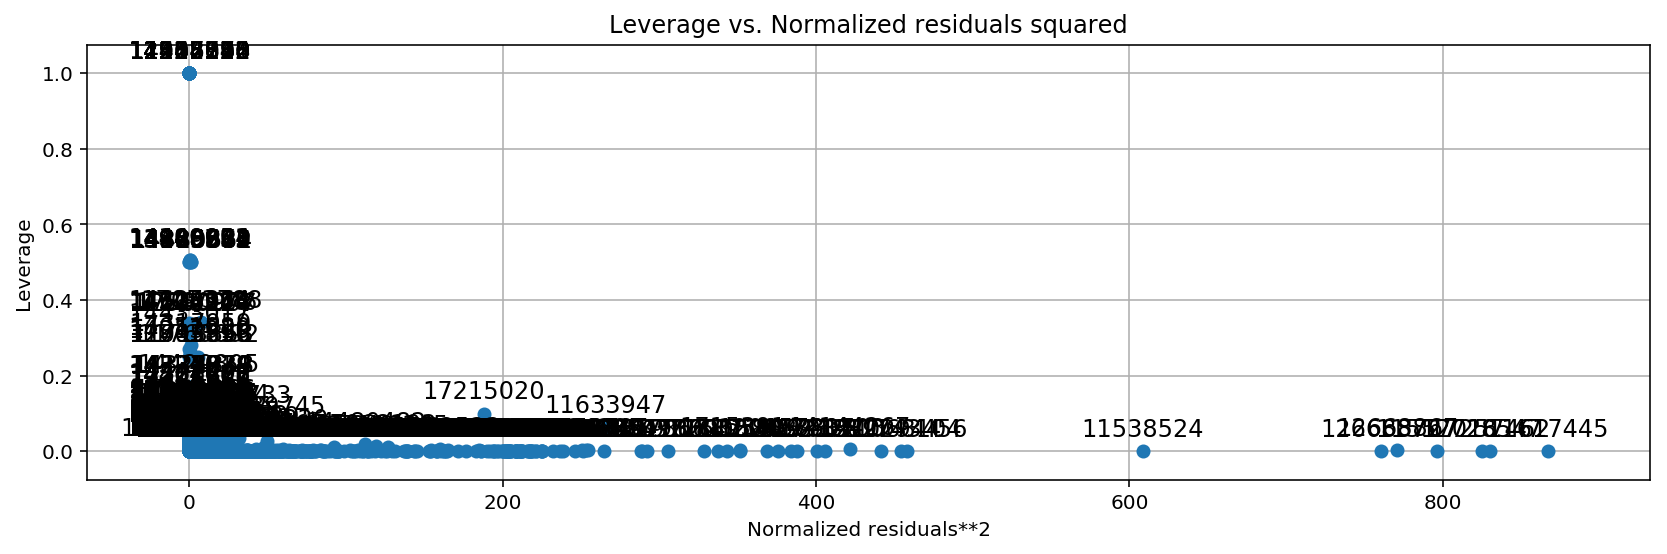

In [33]:
result = model.fit()
sm.graphics.plot_leverage_resid2(result)
plt.show()        

In [34]:
df.reset_index(inplace=True, drop=True)
pred = result.predict(df)
influence = result.get_influence()
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(df["logerror"]) - 46-1)
idx = np.where(cooks_d2 > fox_cr)[0]
idx

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:309: RuntimeWarning: invalid value encountered in sqrt
  return  self.results.resid / sigma / np.sqrt(1 - hii)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  


array([  102,   106,   184, ..., 90167, 90226, 90236], dtype=int64)

In [35]:
len(idx)

2152

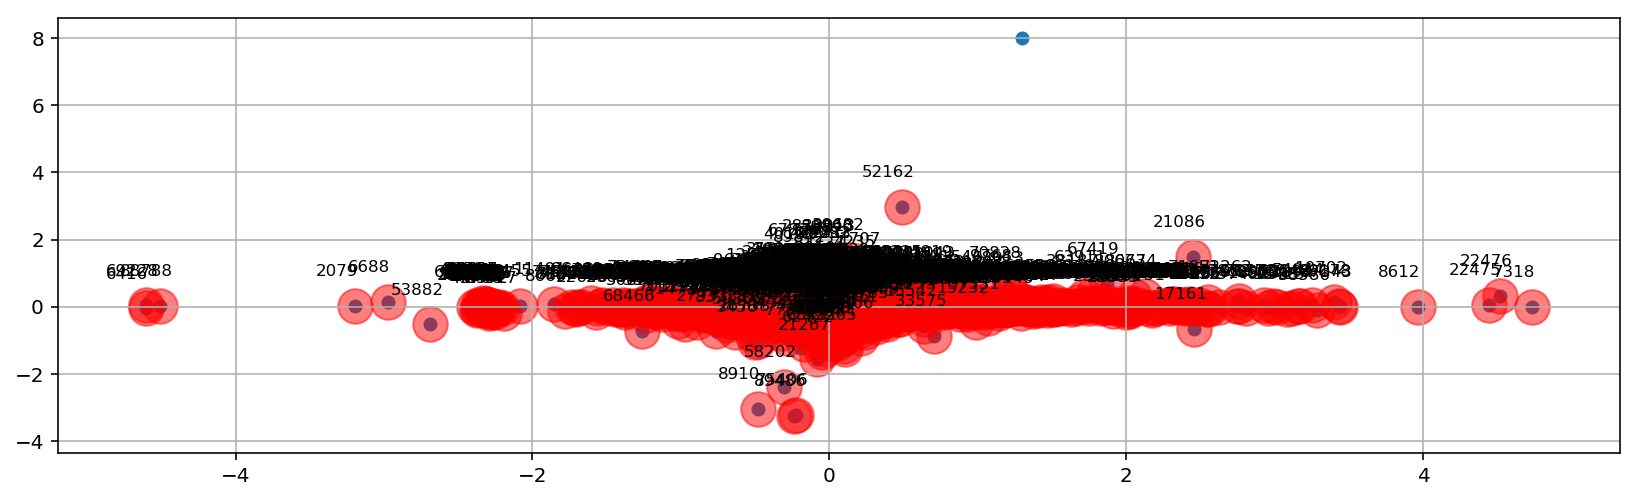

In [36]:
ax = plt.subplot() 
plt.scatter(df["logerror"], pred) 
plt.scatter(df["logerror"][idx], pred[idx], s=300, c="r", alpha=0.5)
utils.annotate_axes(range(len(idx)), idx, list(zip(df["logerror"][idx], pred[idx])), [(-20, 15)] * len(idx), size="small", ax=ax) 
plt.show()

In [53]:
idx2 = list(set(range(len(df))).difference(idx))
dfX = df.iloc[idx2, :].reset_index(drop=True)

In [54]:
model = sm.OLS.from_formula('scale(logerror) ~ scale(taxamount) + scale(landtaxvaluedollarcnt) + scale(structuretaxvaluedollarcnt) + scale(bathroomcnt) + scale(finishedsquarefeet6)+ scale(lotsizesquarefeet)+ scale(regionidneighborhood) + scale(latitude) + C(poolcnt) + C(garagecarcnt) + C(unitcnt) + C(heatingorsystemtypeid) + C(fips) + C(fireplacecnt) + C(propertylandusetypeid)+ C(roomcnt)+ C(bedroomcnt) + 0', data = dfX)
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:        scale(logerror)   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     14.86
Date:                Sat, 07 Jul 2018   Prob (F-statistic):          4.14e-193
Time:                        04:25:00   Log-Likelihood:            -1.2446e+05
No. Observations:               88123   AIC:                         2.491e+05
Df Residuals:                   88043   BIC:                         2.498e+05
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
C(pool